# Personal Carbon Footprint Prediction MVP

In [ ]:
## Import Libraries to generate the dataset even if fake
import numpy as np
import pandas as pd
import scipy
import random

### Collect the features related to personal carbon footprint

In [4]:
col_list = ['electronic_usage', 'transportation', 'waste_management', 'water_usage', 'travel',  
            'income', 'longitude', 'latitude', 'Age', 'food_choices', 'consumer_choices', 'lifestyle_choice', 'carbon_footprint']
length = 10 ** 5
data = pd.DataFrame(np.zeros((length, len(col_list))), columns=col_list)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   electronic_usage  100000 non-null  float64
 1   transportation    100000 non-null  float64
 2   waste_management  100000 non-null  float64
 3   water_usage       100000 non-null  float64
 4   travel            100000 non-null  float64
 5   income            100000 non-null  float64
 6   longitude         100000 non-null  float64
 7   latitude          100000 non-null  float64
 8   Age               100000 non-null  float64
 9   food_choices      100000 non-null  float64
 10  consumer_choices  100000 non-null  float64
 11  lifestyle_choice  100000 non-null  float64
 12  carbon_footprint  100000 non-null  float64
dtypes: float64(13)
memory usage: 9.9 MB


In [6]:
random.random()

0.4666836646992719

### Fill the data using Random Variable of Normal Disturibution

According to the Central Limit Theorem of Stochastic Theory, all human behaviors are related to the Normal Distribution  

In [21]:
## I assumed that mean values is between 0 to 50, std is between 1 to 10
for i in range(6):
    mean = random.random() * 50
    std = 1 + random.random() * 9
    data[col_list[i]] = abs(np.random.normal(mean, std, length))
    

In [22]:
## Fill the Longitude and Latitude
data[col_list[6]] = np.random.uniform(-180, 180, length)
data[col_list[7]] = np.random.uniform(-90, 90, length)


In [23]:
## Fill the Age, we assume that the age is between 1 to 100
data['Age'] = abs(np.random.normal(50, 20, length)).astype('int')


In [29]:
## Fill the Choice Features - Consumer Choices, Food Choices and LifeStyle Choices. I assumed these are binary categories
for i in range(9, 12):
    data[col_list[i]] = np.random.randint(0, 2, length) 

In [40]:
## Fill the Labeled Data - Last column (carbon_footprint)
## Define the weights that we should recognize using Machine Learning
weights = np.zeros(len(col_list)-1)
weights[:6] = np.random.uniform(1, 10, 6)
weights[6:8] = np.random.normal(0, 1, 2) * 3.6
weights[8] = random.random()
weights[9:12] = np.random.normal(0, 1, 3)
bias = random.random() * 2
## Filling
data_val = data[col_list[0:12]].values
footprint = np.sum(weights[:8] * data_val[:, :8], axis=1) + weights[6] * (data_val[:, 6] - 44) ** 2 + weights[7] * (data_val[:, 7] - 20) ** 2 + \
            weights[8] * (data_val[:, 8] - 40) ** 2 + np.sum(weights[9:12] * data_val[:, 9:12], axis=1) + bias + np.random.normal(0, 1, length) / 2
data[col_list[-1]] = footprint
print(weights)
print(bias)

[ 6.38216986  5.80982127  1.64475262  4.34736649  1.97462222  9.34694136
  0.93268002  5.91147105  0.66911915  1.96113737 -0.25928079  0.71732772]
0.6066286574782036


In [41]:
data_val.shape

(100000, 12)

I Assumed that:
- 'electronic_usage', 'transportation', 'waste_management', 'water_usage', 'travel', 'income', has positive correlation to the carbon footprint
- Longtitude and Latitude have specific correlation. For example, US, India and China has a large carbon footprint
- Other Features also have their own correlation
- There would be some white-noises

In [42]:
data

electronic_usage  transportation  waste_management  water_usage   
0              5.000953        5.119387          3.089479    23.946250  \
1              5.265233        1.411019          5.832004    34.808200   
2              5.889760        8.334992          2.991176    33.805909   
3              6.107859       10.222645          1.909282    24.535188   
4              9.330208        2.113723          7.592841    32.583644   
...                 ...             ...               ...          ...   
99995         14.007318       23.146238          6.035923    28.317626   
99996          3.640503       15.703719          0.855548    30.264224   
99997         16.508489        3.849283          0.456023    46.702220   
99998          9.705912       10.800239          5.384209    29.481013   
99999         15.569345       15.608094          0.806562    24.269264   

          travel     income   longitude   latitude  Age  food_choices   
0      14.927705  35.147613  -41.290896 -27.079036   25             1  \
1      11.438776  36.970009   58.691909 -32.381624   40             0   
2      20.701205  31.154768   88.698716  88.744163   34             0   
3       9.345301  27.100171  140.150445  57.019216   46             1   
4      24.000574  42.708487 -158.152979 -48.981581   81             0   
...          ...        ...         ...        ...  ...           ...   
99995  15.768958  34.209068 -106.693436  87.767066   20             1   
99996  25.549703  34.907701   23.169495  23.142777   39             1   
99997   5.555889  44.175256   31.453723 -56.237194   55             1   
99998  15.069067  39.921628  -41.502249 -54.889160  100             1   
99999  24.222429  38.465719   20.479315  73.572764   48             1   

       consumer_choices  lifestyle_choice  carbon_footprint  
0                     0                 1      20370.325335  
1                     1                 1      16856.201543  
2                     1                 0      31001.551676  
3                     0                 1      17699.341663  
4                     0                 0      67605.722453  
...                 ...               ...               ...  
99995                 1                 1      49725.945777  
99996                 0                 0       1248.548756  
99997                 0                 0      35110.386663  
99998                 0                 0      42684.768546  
99999                 1                 0      18685.594453  

[100000 rows x 13 columns]

### Visualization through the Scatter Plotting

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

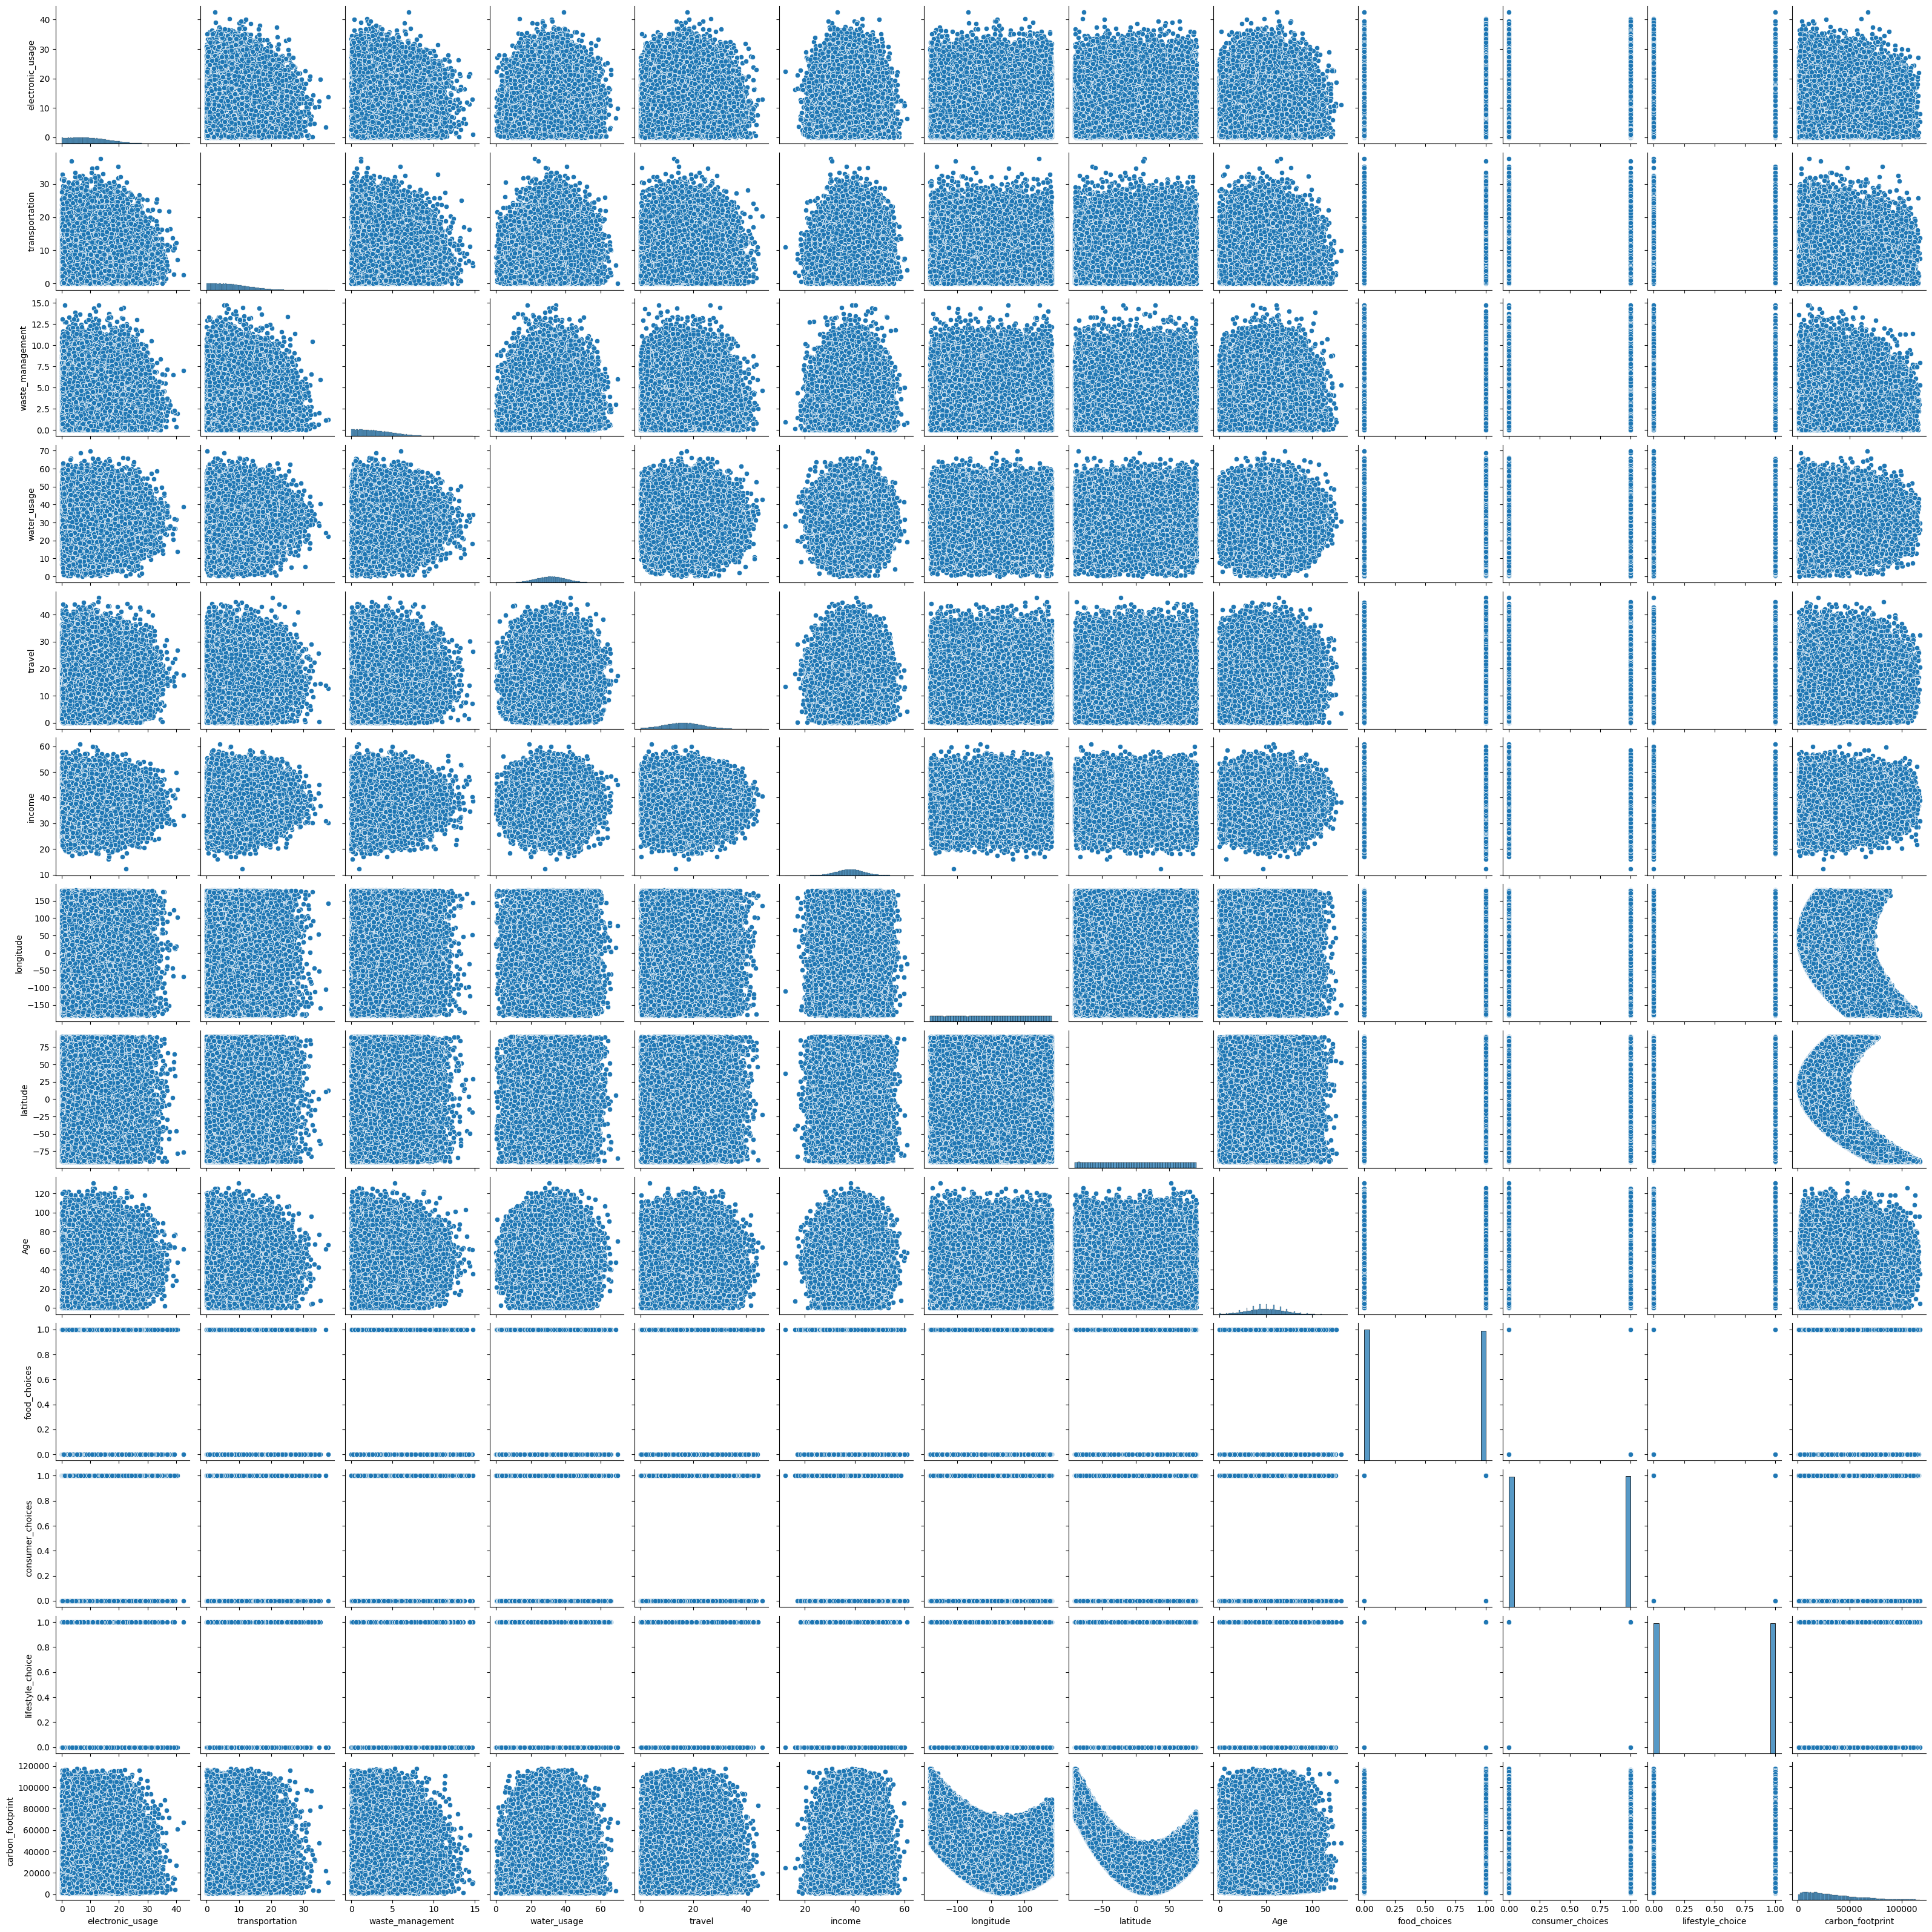

In [44]:
sns.pairplot(data)

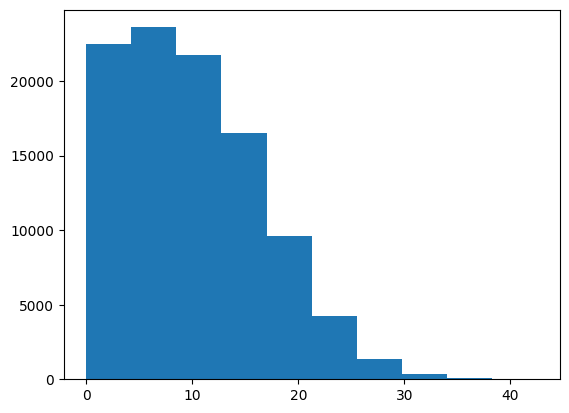

In [45]:
## Build the histogram to get the distribution
plt.hist(data_val[:, 0])
plt.show()

*We can get notices that the distribution of each features and correlation between features. And we can get the type of pattern - linear or non-linear*

### Data Processing to use Machine Learning 

In [46]:
## Import Libraries
import tensorflow as tf
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data_val)
Y = footprint


In [48]:
X


array([[0.11764954, 0.13625802, 0.20916693, ..., 1.        , 0.        ,
        1.        ],
       [0.1238669 , 0.03755414, 0.3948486 , ..., 0.        , 1.        ,
        1.        ],
       [0.13855927, 0.22184625, 0.20251142, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.38837157, 0.10245226, 0.03086978, ..., 1.        , 0.        ,
        0.        ],
       [0.22833666, 0.28746259, 0.36453081, ..., 1.        , 0.        ,
        0.        ],
       [0.36627762, 0.41543101, 0.0546029 , ..., 1.        , 1.        ,
        0.        ]])

In [49]:
### Split the datset by Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
X_train.shape

(80000, 12)

In [51]:
y_train.shape

(80000,)

In [67]:
## Decide to use Kernel SVM Regression Model because we have already have a enough stochastic visualization and proofing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
kernel_SVM = SVR(kernel='poly', degree = 2, C = 1.0, epsilon=0.1)
## Training
kernel_SVM.fit(X_train, y_train)


SVR(degree=2, kernel='poly')

In [68]:
## Compare and Save Parameters
best_params = kernel_SVM.get_params()
print(best_params)
print(weights, bias)

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
[ 6.38216986  5.80982127  1.64475262  4.34736649  1.97462222  9.34694136
  0.93268002  5.91147105  0.66911915  1.96113737 -0.25928079  0.71732772] 0.6066286574782036


In [69]:
## Save the Model
import joblib
joblib.dump(kernel_SVM, 'CarbonFootprint_Model.pkl')

['CarbonFootprint_Model.pkl']

### Validate the mean square error (Ability)

In [70]:
y_pred = kernel_SVM.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print('The accuracy is ' + str(mse))


The accuracy is 376646251.7208665


In [71]:
np.mean(y_pred)

28153.909510672842

In [72]:
np.mean(y_test)

31227.77833785198

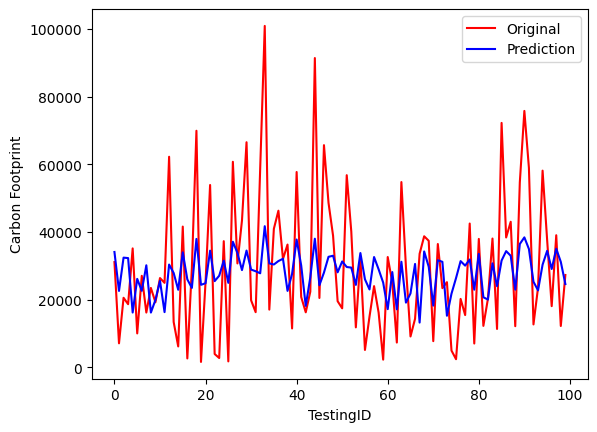

In [74]:
## See the result via graph
import matplotlib.pyplot as plt
personID = range(100)
plt.plot(personID, y_test[-100:], 'r')
plt.plot(personID, y_pred[-100:], 'b')
plt.xlabel('TestingID')
plt.ylabel('Carbon Footprint')
plt.legend(['Original', 'Prediction'])
plt.show()

*Otherwise, we can use K-NN, DNN Model such as CNN Model and LSTM*

### Conclusion

The main challenge of Machine Learning is to process the white noise.
I added the strong white noise and as you can see the result, The model detect well in case of small variance, but not in case of big noise.
